# 9. Boolean Algebra

In [1]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from matplotlib_venn import venn2

import pandas as pd

from sympy import (
    Complement,
    ConditionSet,
    Eq,
    Equivalent,
    EmptySet,
    FiniteSet,
    Implies,
    Intersection,
    Mod,
    Naturals,
    symbols,
    Union,
    UniversalSet
)

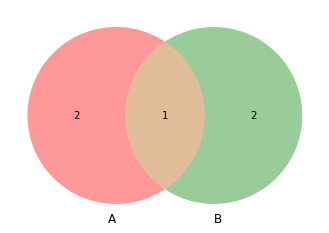

In [2]:
v, w, x, y, z = symbols('v, w, x, y, z')

S = FiniteSet(v, w, x)
T = FiniteSet(x, y, z)

venn2([S.free_symbols, T.free_symbols])
plt.show()

In [3]:
Intersection(S, T)

Intersection(FiniteSet(v, w, x), FiniteSet(x, y, z))

In [4]:
# Intersection
intersection_set = Intersection(S, T)
intersection_set.contains(x) == S.contains(x) & T.contains(x)

True

In [5]:
Union(S, T)

FiniteSet(v, w, x, y, z)

In [6]:
# Union
Union(S, T).contains(x) == S.contains(x) | T.contains(x)

True

In [7]:
# If Then
Intersection(S, T).contains(x) == T.contains(x) | ~S.contains(x)

True

In [8]:
# Complement
Complement(UniversalSet, S).contains(x) == ~S.contains(x)

True

In [9]:
# S is a subset of X which has property H (is even, in this case)
X = Naturals
H = lambda x: Eq(Mod(x, 2), 0)
S = ConditionSet(x, H(x), X); S

ConditionSet(x, Eq(Mod(x, 2), 0), Naturals)

In [10]:
list(zip(range(1, 5), [y in S for y in range(1, 5)]))

[(1, False), (2, True), (3, False), (4, True)]

In [11]:
ConditionSet(x, S.contains(x), X)

ConditionSet(x, Contains(x, Naturals) & Eq(Mod(x, 2), 0), Naturals)

In [12]:
T = ConditionSet(x, H(x), X)

# Equality of 2 subsets of X
Equivalent(
    S == T,
    Equivalent(
        ConditionSet(x, S.contains(x), X),
        ConditionSet(x, T.contains(x), X)
    )
)

True

In [13]:
# Inclusion of subset S in another
Equivalent(
    S.is_subset(T),
    Implies(
        ConditionSet(x, S.contains(x), X),
        ConditionSet(x, T.contains(x), X)
    )
)

True

In [14]:
EmptySet.powerset()

FiniteSet(EmptySet)

## Poset

In [15]:
x, y, z = symbols("x y z")
xyz = FiniteSet(x, y, z)
xyz_power = xyz.powerset()
xyz_power

FiniteSet(EmptySet, FiniteSet(x), FiniteSet(y), FiniteSet(z), FiniteSet(x, y), FiniteSet(x, z), FiniteSet(y, z), FiniteSet(x, y, z))

In [16]:
xyz_power.contains(FiniteSet(x, y))

True

In [17]:
xyz_subsets = list(xyz_power)
xyz_subsets

[EmptySet,
 FiniteSet(x),
 FiniteSet(y),
 FiniteSet(z),
 FiniteSet(x, y),
 FiniteSet(x, z),
 FiniteSet(y, z),
 FiniteSet(x, y, z)]

In [18]:
xyz_subsets[4]

FiniteSet(x, y)

In [19]:
xyz_power.as_relational(xyz_subsets[4])

True

In [20]:
xyz_subsets[1].is_proper_subset(xyz_subsets[4])

True

In [21]:
print(xyz_subsets[1].is_proper_subset(xyz_subsets[6]))

None


In [22]:
hasse_ordering = {
    a: { b: a.is_proper_subset(b) for b in xyz_subsets }
    for a in xyz_subsets
}

pd.DataFrame.from_dict(hasse_ordering)

,(),(x),(y),(z),"(x, y)","(x, z)","(y, z)","(x, y, z)"
(),False,False,False,False,False,False,False,False
(x),True,False,None,None,None,None,None,None
(y),True,None,False,None,None,None,None,None
(z),True,None,None,False,None,None,None,None
"(x, y)",True,True,True,None,False,None,None,None
"(x, z)",True,True,None,True,None,False,None,None
"(y, z)",True,None,True,True,None,None,False,None
"(x, y, z)",True,True,True,True,True,True,True,False


In [23]:
R = FiniteSet(v, w, x, y, z)
S = FiniteSet(v, w, x)
T = FiniteSet(x, y, z)

S.is_subset(Union(S, T))

True

In [24]:
T.is_subset(Union(S, T))

True

In [25]:
Implies(
    S.is_subset(R) & T.is_subset(R),
    Union(S, T).is_subset(R)
)

True